In [27]:
import random
import math
from geopy.distance import geodesic
import osmnx as ox
import networkx as nx

In [29]:
G = ox.graph_from_place("Gattahalli, Bengaluru, India",network_type="drive")

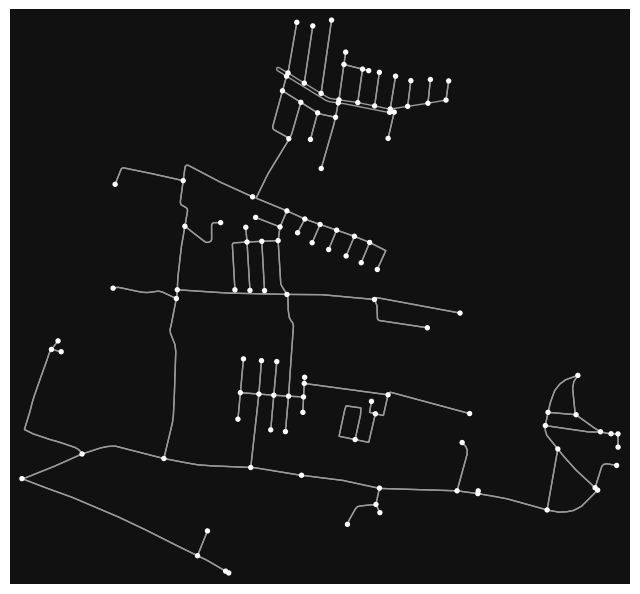

(<Figure size 800x800 with 1 Axes>, <Axes: >)

In [30]:
ox.plot_graph(G)

In [31]:
# Define the latitude and longitude of the start and end points
start_point = random.choice(tuple(G.nodes))
end_point = random.choice(tuple(G.nodes))

print(start_point,end_point)

7324614883 7324984197


In [52]:
# Define the parameters of the genetic algorithm
POPULATION_SIZE = 200
ELITISM_RATIO = 0.1
MUTATION_RATE = 0.01
NUM_GENERATIONS = 1500

In [51]:
# Define the distance function to calculate the distance between two points
def distance(point1, point2):
    distance= 99999999999999
    # return geodesic(point1, point2).km
    try:
        distance= G.get_edge_data(point1,point2)[0]["length"]
    except Exception as e :
        pass
    
    return distance


In [40]:
random.sample(G.nodes,k=3)

[10636672516, 7324614890, 9979629048]

In [17]:
# Define the fitness function to evaluate the fitness of a candidate solution
def fitness(solution):
    total_distance = 0
    for i in range(len(solution) - 1):
        point1 = solution[i]
        point2 = solution[i+1]
        total_distance += distance(point1, point2)
    return 1 / total_distance


In [18]:
# Define the crossover function to combine the genetic material of two parent solutions
def crossover(parent1, parent2):
    child = parent1.copy()
    start_index = random.randint(0, len(parent1) - 2)
    end_index = random.randint(start_index, len(parent1) - 1)
    for i in range(start_index, end_index):
        child[i] = parent2[i]
    return child


In [19]:
# Define the mutation function to introduce random changes to a candidate solution
def mutation(solution):
    for i in range(len(solution)):
        if random.random() < MUTATION_RATE:
            j = random.randint(0, len(solution) - 1)
            solution[i], solution[j] = solution[j], solution[i]
    return solution

In [62]:
# Create an initial population of candidate solutions
population = [ [start_point, end_point] + random.sample(G.nodes, len(G.nodes)) for _ in range(POPULATION_SIZE)]


In [63]:
# Iterate through the generations
for generation in range(NUM_GENERATIONS):
    # Evaluate the fitness of each candidate solution
    fitness_scores = [fitness(solution) for solution in population]
    
    # Select the best solutions for reproduction
    elitism_count = int(POPULATION_SIZE * ELITISM_RATIO)
    elite_indices = sorted(range(len(fitness_scores)), key=lambda k: fitness_scores[k], reverse=True)[:elitism_count]
    elite_solutions = [population[i] for i in elite_indices]
    
    # Create new offspring solutions by combining the genetic material of two parent solutions
    num_offspring = POPULATION_SIZE - elitism_count
    offspring = []
    for i in range(num_offspring):
        parent1 = random.choice(elite_solutions)
        parent2 = random.choice(elite_solutions)
        child = crossover(parent1, parent2)
        child = mutation(child)
        offspring.append(child)
    
    # Replace the worst solutions with the new offspring solutions
    population = elite_solutions + offspring
    

In [64]:
# Select the best solution from the final population
best_solution = max(population, key=fitness)

# Print the best solution
print("Best solution: ", best_solution)

Best solution:  [7324614883, 7324614884, 7324614885, 7324614896, 7324614894, 7324984191, 7324984193, 7324984154, 7324984163]


In [65]:
for i in best_solution:
    print(G.nodes[i]["y"],G.nodes[i]["x"],"marker",sep=",")

12.8756124,77.6986948,marker
12.8750071,77.6982576,marker
12.8756908,77.6983568,marker
12.8756777,77.6964511,marker
12.8754712,77.6967904,marker
12.8722301,77.698154,marker
12.8723556,77.6978362,marker
12.8691752,77.6954571,marker
12.8691467,77.6958435,marker


In [67]:
rand = [7324614883 ,7324984197]
for i in rand:
    print(G.nodes[i]["y"],G.nodes[i]["x"],"marker",sep=",")

12.8756124,77.6986948,marker
12.8725958,77.69712,marker
